<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/serie_temporal_de_trsnaporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install netCDF4
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [5]:
fn = '/content/vel_cur.nc'
df = xr.open_dataset(fn)
df = df.squeeze()
u0 = df['uo']

In [4]:
def transporte_corrente(u, p, lat):
  delta_lat = np.diff(lat)
  delta_lat_rad = np.radians(delta_lat)
  dist_cel = (R * delta_lat_rad)
  delta_p = np.diff(p)

  u = u.transpose()
  c = u[:-1, :-1]

  masc = ~np.isnan(c)
  area_cel = np.outer(dist_cel, delta_p)
  transporte_cel = c * area_cel * masc

  transporte_total = np.nansum(transporte_cel)
  transporte_sv = transporte_total / sv_factor
  return transporte_sv


In [ ]:
R = 6371000
sv_factor = 1e6
transportes = {}
tempos =[]
tranp_valor = []
for i in range(len(u0['time'])):
  u = u0.isel(time=i).squeeze()
  p = u0['depth']
  lat = u0['latitude']

  transporte = transporte_corrente(u, p, lat)
  transportes[i] = transporte
  tranp_valor.append(transporte)
  tempos.append(i)

print(transportes)

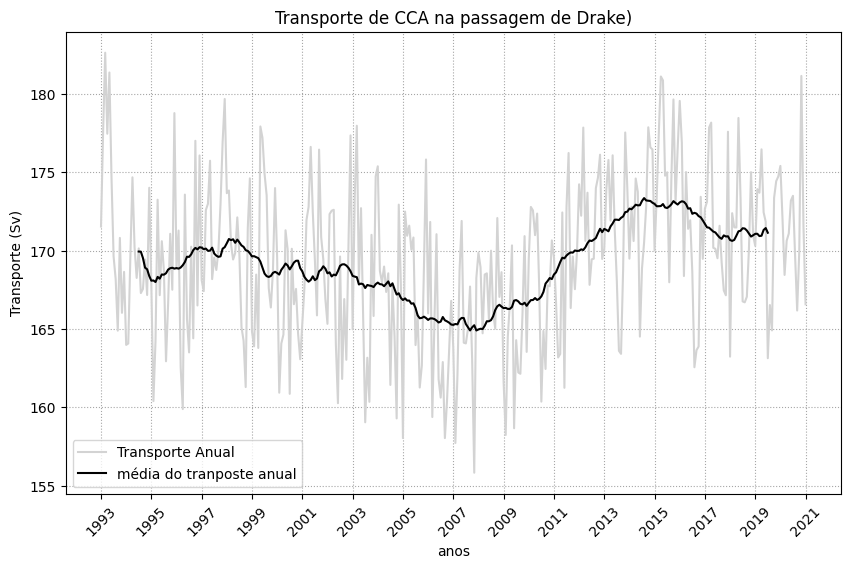

In [55]:
tranp_valor_smooth = pd.Series(tranp_valor).rolling(window=37, center=True).mean()
plt.figure(figsize=(10, 6))
plt.plot(tempos, tranp_valor, linestyle='-', color='lightgray', label='Transporte Anual')
plt.plot(tempos, tranp_valor_smooth, linestyle='-', color='k', label='média do tranposte anual')
plt.xticks(ticks=range(0, len(tempos), 24), labels=range(1993, 1993 + len(range(0, len(tempos), 12)),2), rotation=45)
plt.xlabel('anos')
plt.ylabel('Transporte (Sv)')
plt.title('Transporte de CCA na passagem de Drake)')
plt.grid(color='gray',alpha=0.7, linestyle=':')
plt.legend()
plt.show()